In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import pandas as pd
import numpy as np

In [2]:
train_idg = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
)
test_idg = ImageDataGenerator(
    rescale = 1./255.
)
val_idg = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
IMG_SIZE = (224, 224)

train = train_idg.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                      class_mode='binary',
                                      color_mode="grayscale",
                                      target_size = IMG_SIZE,
                                      batch_size = 32,
                                      shuffle = True,
                                      seed = 42
                                     )
test = test_idg.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                    class_mode='binary',
                                    color_mode="grayscale",
                                    target_size = IMG_SIZE,
                                    batch_size = 32,
                                    shuffle = True,
                                    seed = 42
                                   )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
trainX, trainY = next(train)
testX, testY = next(test)

In [8]:
print(len(trainX), len(trainY))

32 32


In [9]:
print('Train X=%s Y=%s' %(trainX.shape, trainY.shape))
print('Test X=%s Y=%s' %(testX.shape, testY.shape))

Train X=(32, 224, 224, 1) Y=(32,)
Test X=(32, 224, 224, 1) Y=(32,)


<Axes: xlabel='count'>

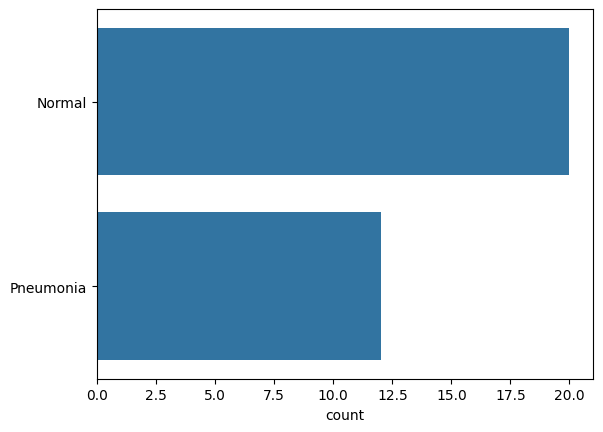

In [10]:
labels = ['Pneumonia' if label == 0 else 'Normal' for label in trainY]
sns.countplot(labels)

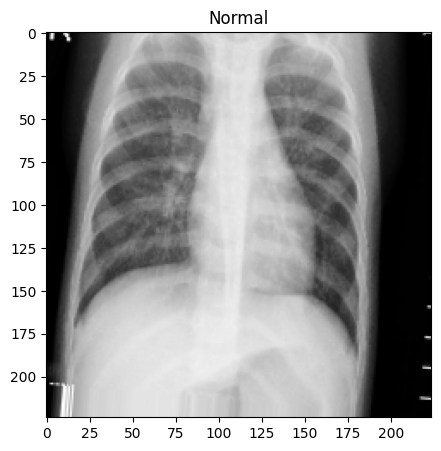

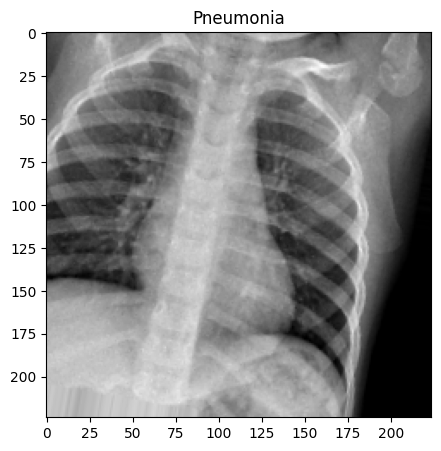

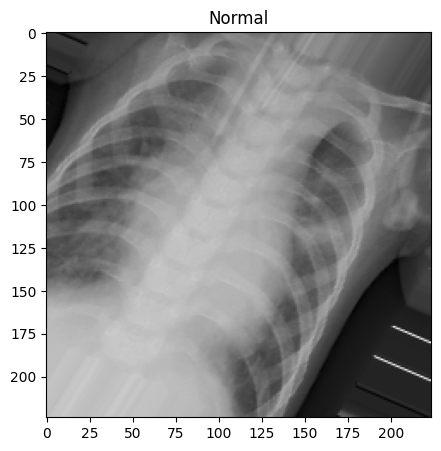

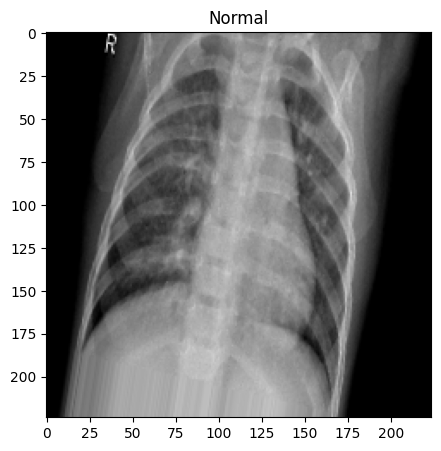

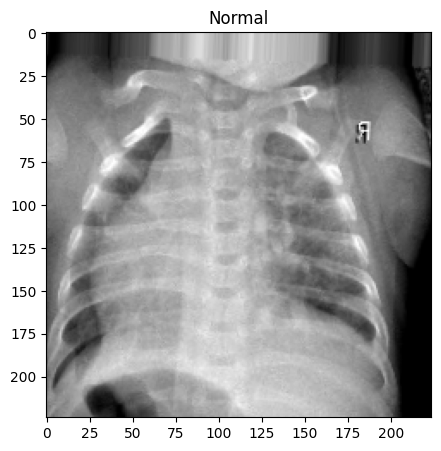

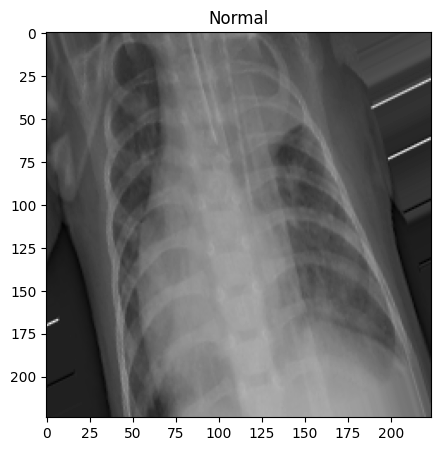

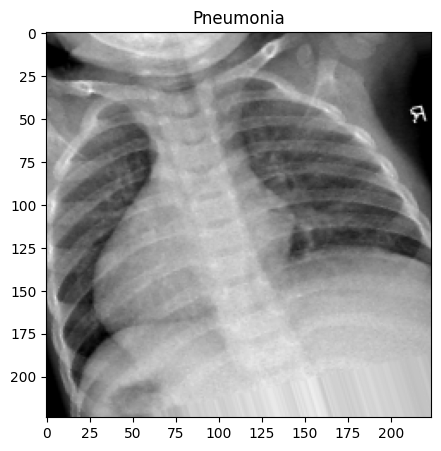

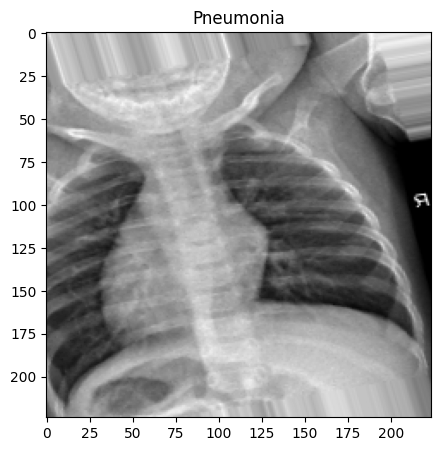

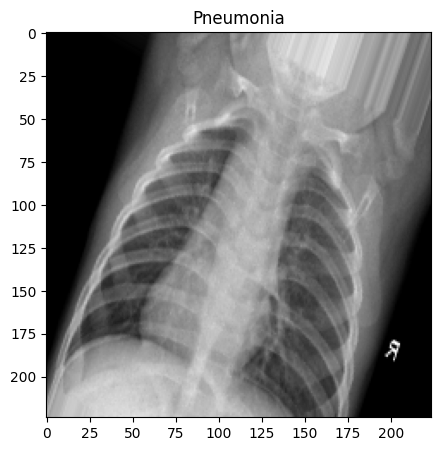

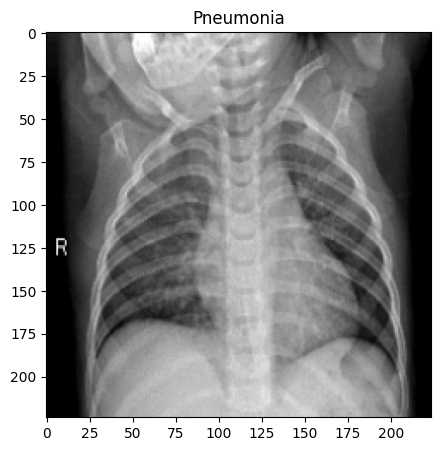

In [11]:
for idx in range(10):
    plt.figure(figsize=(5,5))
    plt.imshow(trainX[idx].reshape(224,224), cmap='gray')
    plt.title(labels[idx])

In [12]:
print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX .shape[0], "test samples")

x_train shape: (32, 224, 224, 1)
32 train samples
32 test samples


In [13]:
model = Sequential(name = "Sequential")
model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (224, 224,1) , name="FirstConvolution"))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="FirstMaxPool"))
model.add(Dropout(0.2, name="FirstDroupout"))
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="SecondConvolution"))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="SecondMaxPool"))
model.add(Dropout(0.2, name="SecondDroupout"))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="ThirdConvolution"))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="ThirdMaxPool"))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="ForthConvolution"))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="ForthMaxPool"))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , name="FifthConvolution"))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same' , name="FifthMaxPool"))
model.add(Flatten(name="Flatten"))
model.add(Dense(units = 128 , activation = 'relu' , name="FirstDense"))
model.add(Dense(units = 64 , activation = 'relu' , name="SecondDense"))
model.add(Dropout(0.2 , name="ForthDroupout"))
model.add(Dense(units = 32 , activation = 'relu' , name="ThirdDense"))
model.add(Dropout(0.2 , name="FifthDroupout"))
model.add(Dense(units = 2, activation='softmax' , name="ForthDense"))
model.compile(optimizer= "Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FirstConvolution (Conv2D)   (None, 224, 224, 16)      160       
                                                                 
 FirstMaxPool (MaxPooling2D  (None, 112, 112, 16)      0         
 )                                                               
                                                                 
 FirstDroupout (Dropout)     (None, 112, 112, 16)      0         
                                                                 
 SecondConvolution (Conv2D)  (None, 112, 112, 32)      4640      
                                                                 
 SecondMaxPool (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 SecondDroupout (Dropout)    (None, 56, 56, 32)        0

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(train, epochs = 16 , callbacks = [learning_rate_reduction])

Epoch 1/16
 11/163 [=>............................] - ETA: 54:41 - loss: 0.6388 - accuracy: 0.7216

In [ ]:
print("Loss of the model is - " , model.evaluate(testX,testY)[0])
print("Accuracy of the model is - " , model.evaluate(testX,testY)[1]*100 , "%")

32/32 [==============================] - 0s 3ms/step
Loss of the model is -  0.07728264480829239
32/32 [==============================] - 0s 3ms/step
Accuracy of the model is -  96.875 %


In [ ]:
predictions = model.predict_classes(testX)
predictions = predictions.reshape(1,-1)[0]
print(predictions[:32])

[1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1]


In [ ]:
print(classification_report(testY, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       1.00      0.93      0.96        14
   Normal (Class 1)       0.95      1.00      0.97        18

           accuracy                           0.97        32
          macro avg       0.97      0.96      0.97        32
       weighted avg       0.97      0.97      0.97        32



In [ ]:
print('Confusion Matrix\n')
matrix = confusion_matrix(testY,predictions)
print(matrix)

Confusion Matrix

[[13  1]
 [ 0 18]]


In [ ]:
correct = np.nonzero(predictions == testY)[0]
incorrect = np.nonzero(predictions != testY)[0]
print(len(correct), len(incorrect))

31 1


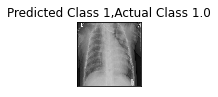

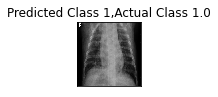

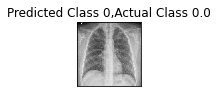

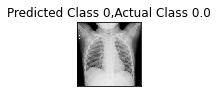

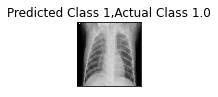

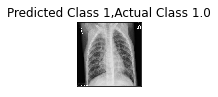

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], testY[c]))
    plt.show()
    i += 1

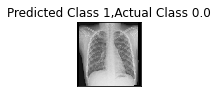

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[c].reshape(224, 224), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], testY[c]))
    plt.show()
    i += 1